In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
y1 = pd.read_csv('year1.csv')
y2 = pd.read_csv('year2.csv')
y3 = pd.read_csv('year3.csv')
y4 = pd.read_csv('year4.csv')

In [3]:
data = pd.concat([y1,y2,y3,y4])

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,id,TARGET
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,1,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,2,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,3,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,4,0


In [5]:
data['TARGET'].value_counts()

0    35814
1     1681
Name: TARGET, dtype: int64

In [6]:
data.isnull().sum().sort_values()


X1        0
X36       0
X37       0
X38       0
X39       0
         ..
X29       0
X30       0
X31       0
X17       0
TARGET    0
Length: 66, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37495 entries, 0 to 9791
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      37495 non-null  object
 1   X2      37495 non-null  object
 2   X3      37495 non-null  object
 3   X4      37495 non-null  object
 4   X5      37495 non-null  object
 5   X6      37495 non-null  object
 6   X7      37495 non-null  object
 7   X8      37495 non-null  object
 8   X9      37495 non-null  object
 9   X10     37495 non-null  object
 10  X11     37495 non-null  object
 11  X12     37495 non-null  object
 12  X13     37495 non-null  object
 13  X14     37495 non-null  object
 14  X15     37495 non-null  object
 15  X16     37495 non-null  object
 16  X17     37495 non-null  object
 17  X18     37495 non-null  object
 18  X19     37495 non-null  object
 19  X20     37495 non-null  object
 20  X21     37495 non-null  object
 21  X22     37495 non-null  object
 22  X23     37495 non-null 

In [8]:
obj_cols = data.select_dtypes(include=['object']).columns
# y1[obj_cols] = y1[obj_cols].astype('float64')
for i in obj_cols:
    data[i] = pd.to_numeric(data[i], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37495 entries, 0 to 9791
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      37490 non-null  float64
 1   X2      37490 non-null  float64
 2   X3      37490 non-null  float64
 3   X4      37382 non-null  float64
 4   X5      37417 non-null  float64
 5   X6      37490 non-null  float64
 6   X7      37490 non-null  float64
 7   X8      37419 non-null  float64
 8   X9      37487 non-null  float64
 9   X10     37490 non-null  float64
 10  X11     37454 non-null  float64
 11  X12     37382 non-null  float64
 12  X13     37368 non-null  float64
 13  X14     37490 non-null  float64
 14  X15     37465 non-null  float64
 15  X16     37418 non-null  float64
 16  X17     37419 non-null  float64
 17  X18     37490 non-null  float64
 18  X19     37367 non-null  float64
 19  X20     37368 non-null  float64
 20  X21     31744 non-null  float64
 21  X22     37490 non-null  float64
 22 

In [9]:

data.isnull().sum().sort_values()


TARGET        0
id            0
X55           1
X59           4
X57           4
          ...  
X45        1879
X60        1884
X27        2373
X21        5751
X37       16436
Length: 66, dtype: int64

In [10]:
y1.iloc[:, 20:37:(37-21)].describe()

,X21,X37
count,7027,7027
unique,4032,4134
top,?,?
freq,1622,2740


In [11]:
data_full = data.set_index('id')


In [12]:
X = data_full.drop(['TARGET'], axis=1)
y = data.TARGET

In [13]:
X.isnull().sum().sort_values()

X55        1
X59        4
X57        4
X1         5
X29        5
       ...  
X45     1879
X60     1884
X27     2373
X21     5751
X37    16436
Length: 64, dtype: int64

In [14]:
X.fillna(0, inplace=True)

In [15]:
X.isnull().sum().sort_values()

X1     0
X35    0
X36    0
X37    0
X38    0
      ..
X28    0
X29    0
X30    0
X63    0
X64    0
Length: 64, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5, random_state=0)

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))
print(cm.dtype)
cm

int64


array([[8893,   69],
       [ 290,  122]])

array([[1678,   12],
       [  53,   14]])

In [20]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    ax.set_xticklabels(['']+[1,2,3])#クラスラベル表示を(0,1)→(1,2)に修正、3クラスにも対応
    ax.set_yticklabels(['']+[1,2,3])
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

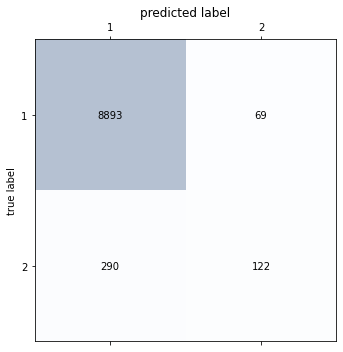

In [21]:
plot_cm(cm)

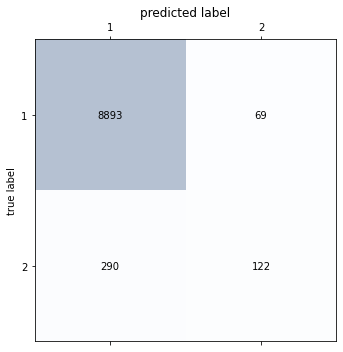

In [22]:
plot_cm(cm)

In [23]:
from sklearn import metrics
metrics.accuracy_score(y_test, rfc.predict(X_test))

0.9617025816087049

In [24]:
from sklearn import metrics
metrics.accuracy_score(y_test, rfc.predict(X_test))

0.9617025816087049

In [25]:
# 再現率
metrics.recall_score(y_test, rfc.predict(X_test), average='macro')

0.644208665281458

In [26]:
#  適合率
metrics.precision_score(y_test, rfc.predict(X_test), average='macro')

0.803581680923035

In [27]:
# F値
metrics.f1_score(y_test, rfc.predict(X_test), average='macro')

0.6924291923317187

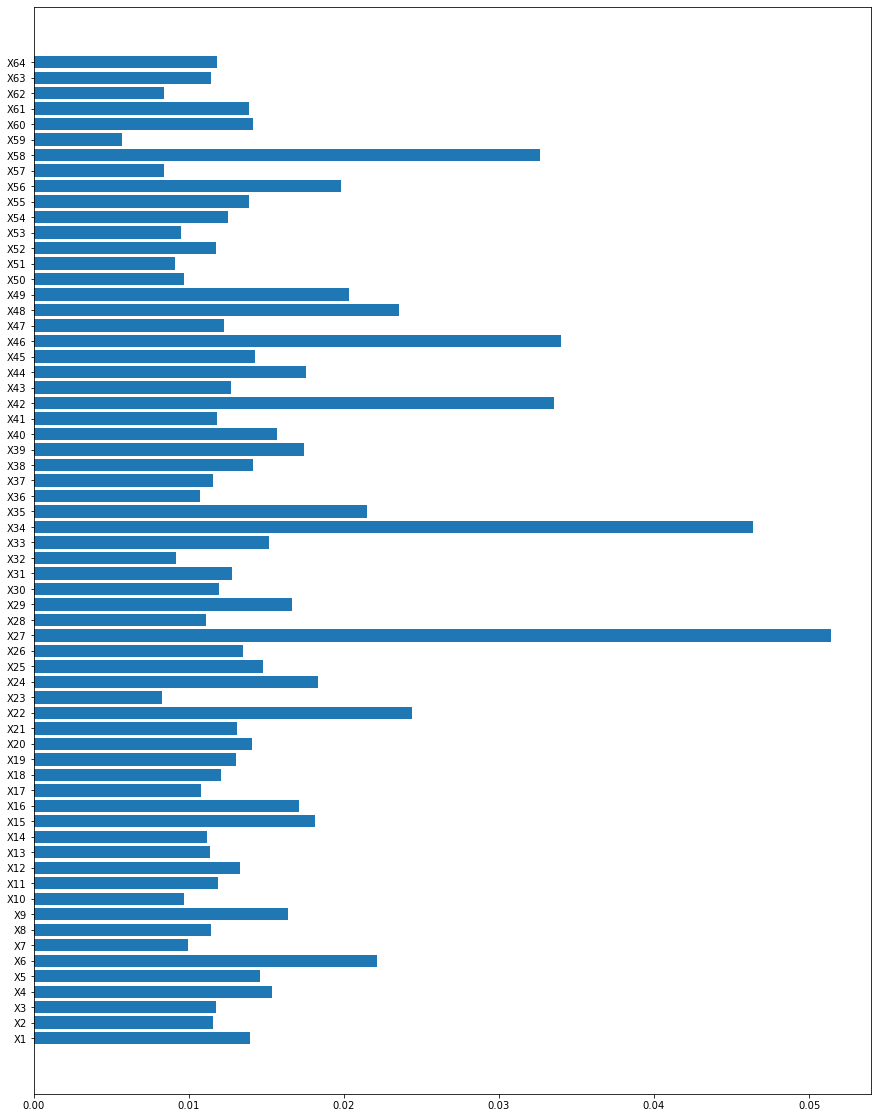

In [28]:
n_features = len(X.columns)
plt.figure(figsize=(15, 20))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.show()

In [29]:
submit_data = pd.read_csv('test.csv', index_col='id')

In [30]:
obj_cols_sub = submit_data.select_dtypes(include=['object']).columns
# y1[obj_cols] = y1[obj_cols].astype('float64')
for i in obj_cols_sub:
    submit_data[i] = pd.to_numeric(submit_data[i], errors='coerce')
submit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5907 non-null   float64
 1   X2      5907 non-null   float64
 2   X3      5907 non-null   float64
 3   X4      5889 non-null   float64
 4   X5      5899 non-null   float64
 5   X6      5907 non-null   float64
 6   X7      5907 non-null   float64
 7   X8      5892 non-null   float64
 8   X9      5909 non-null   float64
 9   X10     5907 non-null   float64
 10  X11     5907 non-null   float64
 11  X12     5889 non-null   float64
 12  X13     5910 non-null   float64
 13  X14     5907 non-null   float64
 14  X15     5904 non-null   float64
 15  X16     5892 non-null   float64
 16  X17     5892 non-null   float64
 17  X18     5907 non-null   float64
 18  X19     5910 non-null   float64
 19  X20     5910 non-null   float64
 20  X21     5807 non-null   float64
 21  X22     5907 non-null   float64
 22  

In [31]:
submit_data.isnull().sum().sort_values()

X20       0
X56       0
X42       0
X43       0
X31       0
       ... 
X24     135
X45     268
X60     268
X27     391
X37    2548
Length: 64, dtype: int64

In [32]:
submit_data.fillna(0, inplace=True)

In [33]:
submit_data.isnull().sum().sort_values()

X1     0
X35    0
X36    0
X37    0
X38    0
      ..
X28    0
X29    0
X30    0
X63    0
X64    0
Length: 64, dtype: int64

In [34]:
submit_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
id,,,,,,,,,,,,,,,,,,,,,
0,0.000907,0.95294,0.047059,1.04940,6.3527,0.00000,0.001120,0.049382,2.66730,0.047058,...,108.81,0.000195,0.019282,0.99958,0.000000,0.0000,2.7963,130.400,2.79900,0.0000
1,-0.280200,0.26925,0.080050,1.35220,-22.2700,0.00000,-0.274120,2.714000,1.07360,0.730750,...,2539.40,-0.094680,-0.383450,1.23540,0.028909,7.4423,9.2147,77.275,4.72340,1.5499
2,-0.048608,0.96010,-0.633990,0.31165,-349.9100,-0.70338,-0.063378,0.041537,0.76875,0.039880,...,-28329.00,-0.157900,-1.218900,1.02730,0.709320,4.6351,6.9494,437.300,0.83467,1.0783
3,0.009110,1.13180,0.042193,1.10270,-17.0490,-0.14557,0.023581,-0.116420,1.19280,-0.131760,...,448.87,0.106750,-0.069138,0.98023,-5.471800,13.2340,3.3246,125.700,2.90370,2.1806
4,0.161060,0.58040,-0.043560,0.91052,-60.8840,0.23566,0.161060,0.559400,1.00820,0.324670,...,-1693.80,0.008140,0.496080,0.99186,0.288200,7.8449,6.6126,114.820,3.17890,2.7797


In [35]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
id,,,,,,,,,,,,,,,,,,,,,
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [36]:
output = pd.DataFrame(data= {'id':submit_data.index, 
                             'TARGET':rfc.predict(submit_data)})
# output.set_index('id', inplace=True)
output.to_csv('submission.csv', index=False)
output


,id,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
5905,5905,0
5906,5906,0
5907,5907,0
5908,5908,0


In [37]:
check_sub = pd.read_csv('submission.csv')

In [38]:
check_sub.set_index('id').to_csv('submission1.csv')